In [1]:
import pandas
import mba263
import matplotlib.pyplot as plt

Bring in data on Clinton impeachment votes

In [2]:
data = pandas.read_csv('data/impeach.csv')

In [3]:
data

,senator,state,vote1,conserv
0,shelby,AL,not guilty,92
1,sessions,AL,guilty,100
2,murkowsk,AK,guilty,68
3,stevens,AK,not guilty,58
4,kyl,AZ,guilty,96
...,...,...,...,...
95,rockefel,WV,not guilty,8
96,feingold,WI,not guilty,8
97,kohl,WI,not guilty,20
98,enzi,WY,guilty,88


How many people voted guilty?

In [4]:
mba263.tabulate(data['vote1'])

,Name,Count,Frequency
1,guilty,45,0.45
0,not guilty,55,0.55


What was the average conservatism rating by vote?

In [5]:
data[ ['vote1','conserv'] ].groupby('vote1').mean()

,conserv
vote1,
guilty,83.022222
not guilty,18.090909


We'll make a dummy variable for guilty vote (1=guilty, 0= not guilty)

Then we can plot conservative score against vote

<AxesSubplot:xlabel='conserv', ylabel='vote'>

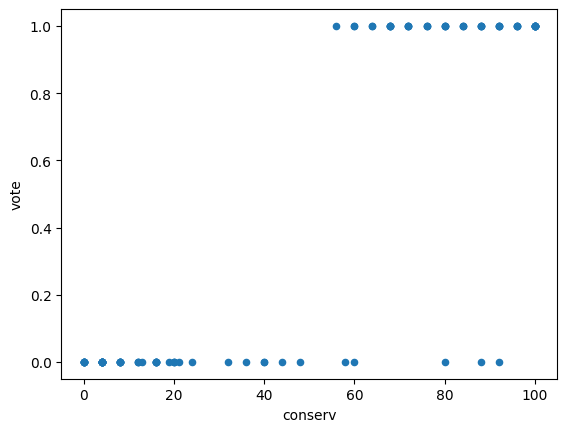

In [6]:
data['vote']=(data['vote1']=='guilty')*1
data[ ['vote','conserv'] ].plot.scatter(y='vote',x='conserv')

Let's run a regression to predict this:

$ vote = \alpha + \beta*conserv $



In [7]:
result=mba263.regress(data['vote'],data['conserv'])

In [8]:
result.params

const     -0.096757
conserv    0.011557
dtype: float64

Then we can plot the results: we will be plotting the model line of fit that uses $\hat{\alpha}+ \hat{\beta}*conserv$, where $\hat{}$ denotes a fitted value

The first line of code plots our data points again. The second line below plots a line. We use <code>plt.plot([x1,x2],[y1,y2])</code> to plot a line of our own definition. Here, we plot the end points at 0 and 100 on x axis, and fit those values into our model by calling <code>MODELOBJECT.params</code> : $\hat{\alpha}+ \hat{\beta}*0$ and $\hat{\alpha}+ \hat{\beta}*100$

In [9]:
[result.params[0]+result.params[1]*0,result.params[0]+result.params[1]*100]

[-0.09675719869614552, 1.0589333502282796]

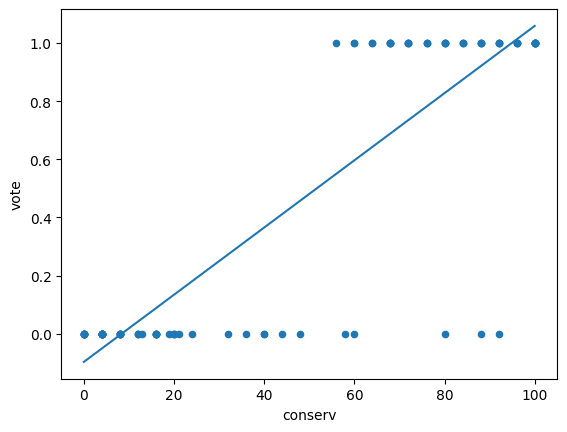

In [10]:
data[ ['vote','conserv'] ].plot.scatter(y='vote',x='conserv')
plt.plot([0,100],[result.params[0]+result.params[1]*0,result.params[0]+result.params[1]*100])

Look at the endpoints of this line - they are outside the interval [0,1]. Vote can only take on values of 0 or 1, and our model is trying to fit $Pr(vote=1)$, which should only be in [0,1]. What can we do?

We can manually truncate the model- if it predicts >1, assign to 1, if it predicts<0 , assign to 0

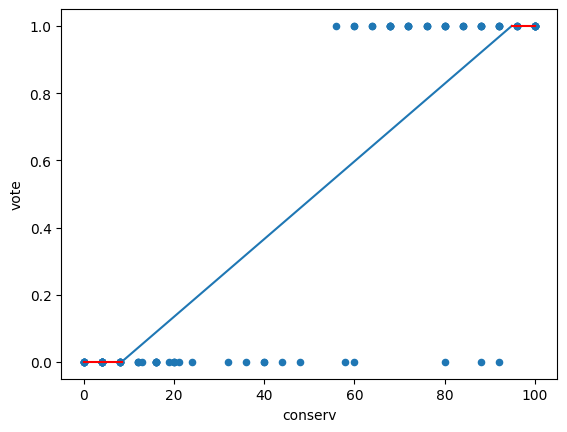

In [11]:
data[ ['vote','conserv'] ].plot.scatter(y='vote',x='conserv')
plt.plot([-result.params[0]/result.params[1],(1-result.params[0])/result.params[1]],[0,1])
plt.plot([0,-result.params[0]/result.params[1]],[0,0],'r')
plt.plot([(1-result.params[0])/result.params[1],100],[1,1],'r')

Here's where we can use logit model! We have a handy function <code>mba263.logit(Y,X)</code> where Y is a vector (single column) dependent variable, and X is one or more explanatory variables.

In [12]:
result_logit = mba263.logit(data['vote'],data['conserv'])

Optimization terminated successfully.
         Current function value: 0.185537
         Iterations 8


We will get a <code>.summary()</code> just like with OLS/regression results:

In [13]:
result_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   vote   No. Observations:                  100
Model:                    Mba263Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7304
Time:                        02:10:59   Log-Likelihood:                -18.554
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 1.172e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2067      1.567     -3.962      0.000      -9.277      -3.136
conserv        0.1083      0.024      4.543      0.000       0.062       0.155
==============================================================================
"""

We can also get the odds ratios for our non-constant coefficients by using <code>mba263.odds_ratios(MODELOBJECT)</code>

In [14]:
mba263.odds_ratios(result_logit)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
conserv,1.114338,0.026553,4.30601,0.0,1.062825,1.165852


We will store the predicted values of the model using <code>MODELOBJECT.predict()</code>, which tells us the <i> fitted values</i> by default - what the model predicts for the data we actually gave it. 

(note - we can also use this "out of sample" on new data - will do this later to predict)

In [15]:
data['predicted']=result_logit.predict()

In [16]:
data['predicted']

0     0.977096
1     0.990237
2     0.760423
3     0.518090
4     0.985025
        ...   
95    0.004770
96    0.004770
97    0.017267
98    0.965116
99    0.947209
Name: predicted, Length: 100, dtype: float64

We can plot the predicted values:

<AxesSubplot:xlabel='conserv', ylabel='predicted'>

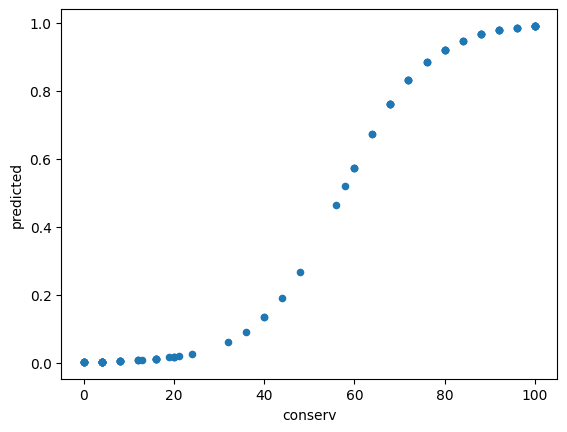

In [17]:
data[ ['conserv','predicted'] ].plot(kind='scatter',x='conserv',y='predicted')

In [18]:
result_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   vote   No. Observations:                  100
Model:                    Mba263Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7304
Time:                        02:11:00   Log-Likelihood:                -18.554
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 1.172e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2067      1.567     -3.962      0.000      -9.277      -3.136
conserv        0.1083      0.024      4.543      0.000       0.062       0.155
==============================================================================
"""

Last part: let's see how this model makes <i> smooth </i> predictions: if we sort by conservative rating, the model predicts marginally more vote guilty propensity for each subsequent senator.

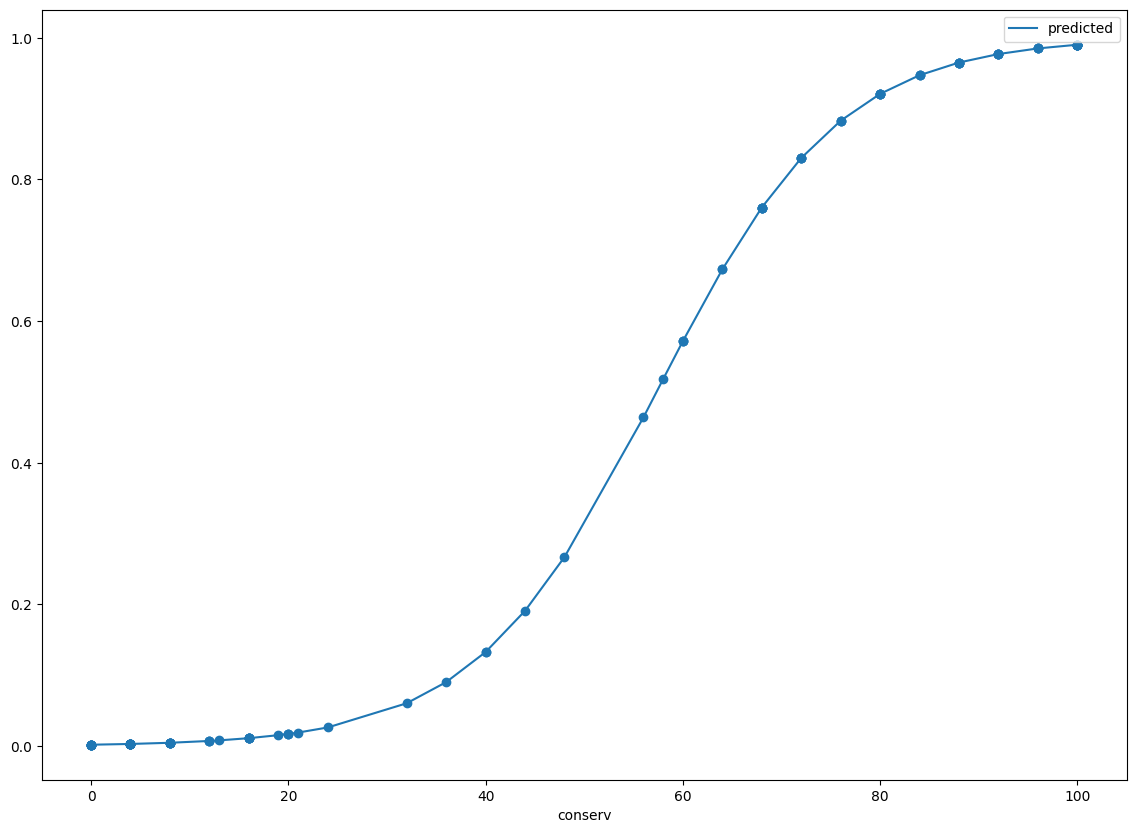

In [19]:
data[ ['conserv','predicted'] ].sort_values('conserv').plot(kind='line',x='conserv',y='predicted',figsize=[14, 10])
plt.scatter(data['conserv'], data['predicted'])

## Additional example: comparisons for Tuscan Lifestyles response prediction

In [20]:
df=pandas.read_csv('data/tuscan_rfm.csv')
df['buyer_dummy']=1*(df['buyer']=='yes')
df.head()

,numords,totdol,last,buyer,dollars,rfm1,rfm2,buyer_dummy
0,7,493,207,no,0,222,211,0
1,4,423,625,no,0,421,422,0
2,4,246,28,no,0,134,122,0
3,3,271,778,no,0,523,532,0
4,2,148,396,no,0,343,343,0


Let's first try a linear model: 

$\text{buyer_dummy} = a + b*\text{last}$

In [21]:
mba263.regress(df['buyer_dummy'],df[['last']]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Mba263OLS Regression Results                         
==============================================================================
Dep. Variable:            buyer_dummy   R-squared:                       0.003
Model:                      Mba263OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     279.7
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.09e-62
Time:                        02:11:00   Log-Likelihood:                 43286.
No. Observations:               96551   AIC:                        -8.657e+04
Df Residuals:                   96549   BIC:                        -8.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0367      0.001     41.652      0.000       0.035       0.038
last       -2.691e-05   1.61e-06    -16.723      0.000   -3.01e-05   -2.38e-05
==============================================================================
Omnibus:                   107750.967   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5683292.372
Skew:                           6.117   Prob(JB):                         0.00
Kurtosis:                      38.539   Cond. No.                         972.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can save the output using .predict()

In [22]:
df['linear_pred']=mba263.regress(df['buyer_dummy'],df[['last']]).predict()
df.head()

,numords,totdol,last,buyer,dollars,rfm1,rfm2,buyer_dummy,linear_pred
0,7,493,207,no,0,222,211,0,0.031168
1,4,423,625,no,0,421,422,0,0.019920
2,4,246,28,no,0,134,122,0,0.035985
3,3,271,778,no,0,523,532,0,0.015802
4,2,148,396,no,0,343,343,0,0.026082


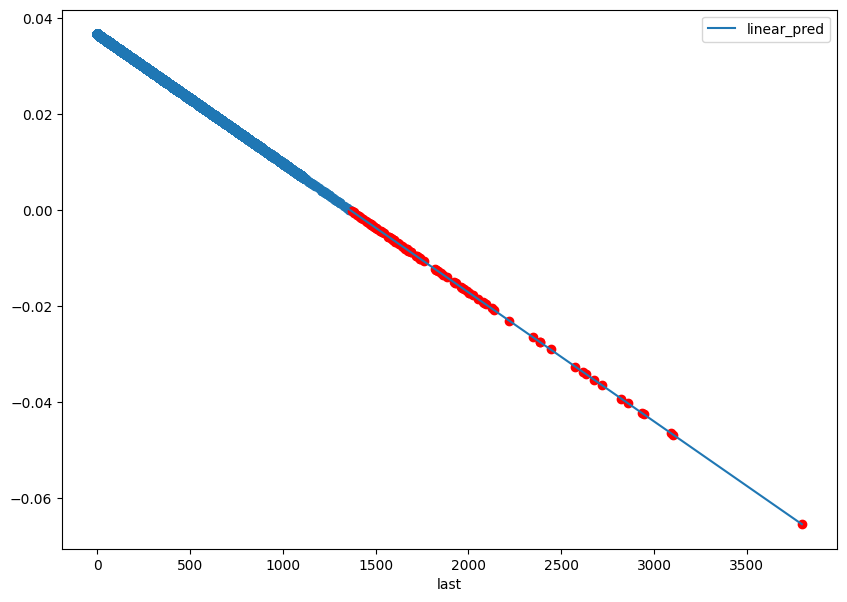

In [23]:
df[ ['last','linear_pred'] ].sort_values('last').plot(kind='line',x='last',y='linear_pred',figsize=[10,7])
plt.scatter(df.loc[df['linear_pred']>=0,'last'], df.loc[df['linear_pred']>=0,'linear_pred'])
plt.scatter(df.loc[df['linear_pred']<0,'last'], df.loc[df['linear_pred']<0,'linear_pred'],color='red')

We can avoid negative predictions in two ways... mabye we can have a nonlinear term and also include $\text{last}^2$ ?


In [24]:
df['last_sq']=df['last']**2

In [25]:
df['linear_pred_sq']=mba263.regress(df['buyer_dummy'],df[['last','last_sq']]).predict()
df.head()

,numords,totdol,last,buyer,dollars,rfm1,rfm2,buyer_dummy,linear_pred,last_sq,linear_pred_sq
0,7,493,207,no,0,222,211,0,0.031168,42849,0.031146
1,4,423,625,no,0,421,422,0,0.019920,390625,0.017397
2,4,246,28,no,0,134,122,0,0.035985,784,0.040031
3,3,271,778,no,0,523,532,0,0.015802,605284,0.014814
4,2,148,396,no,0,343,343,0,0.026082,156816,0.023716


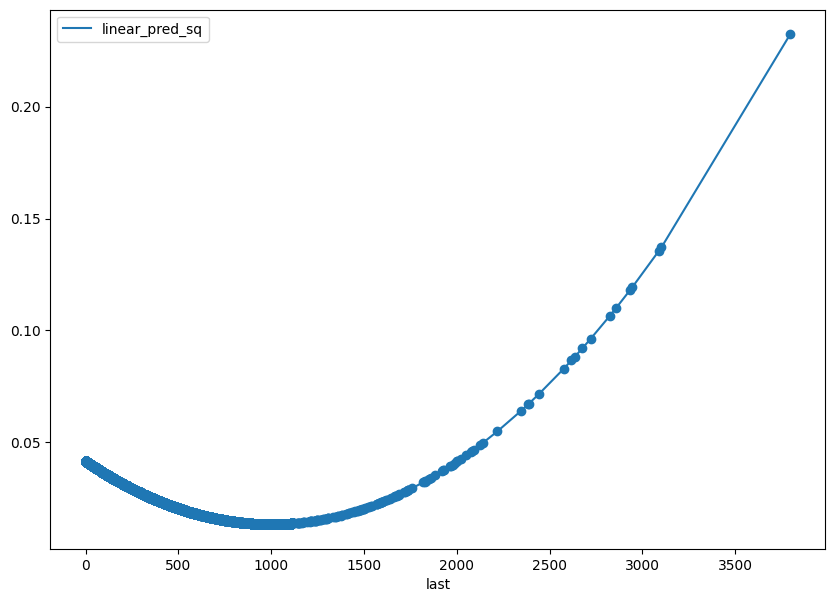

In [26]:
df[ ['last','linear_pred_sq'] ].sort_values('last').plot(kind='line',x='last',y='linear_pred_sq',figsize=[10,7])
plt.scatter(df.loc[df['linear_pred_sq']>=0,'last'], df.loc[df['linear_pred_sq']>=0,'linear_pred_sq'])
plt.scatter(df.loc[df['linear_pred_sq']<0,'last'], df.loc[df['linear_pred_sq']<0,'linear_pred_sq'],color='red')


Caution: adding square terms may give bizarre predictions! bad model..

Let's compare to our RFM/decile plot...

<AxesSubplot:xlabel='freq_dec'>

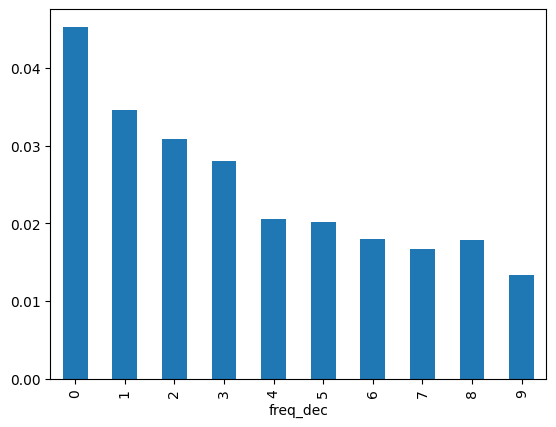

In [27]:
df['freq_dec']=mba263.ntile(df['last'],10)
df.groupby('freq_dec')['buyer_dummy'].mean().plot(kind='bar')

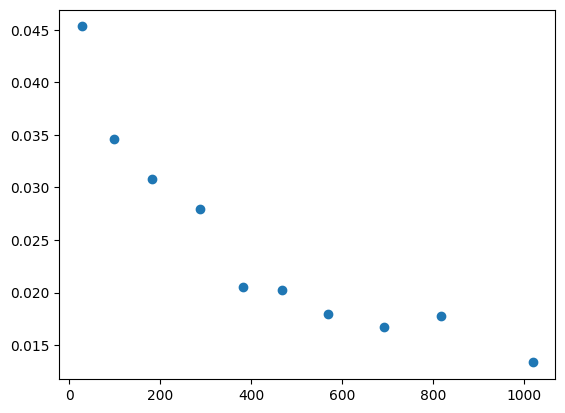

In [28]:
plt.scatter(df.groupby('freq_dec')['last'].mean(),df.groupby('freq_dec')['buyer_dummy'].mean())

Can approach with logistic regression!

In [29]:
result_logit_tuscan = mba263.logit(df['buyer_dummy'],df['last'])

Optimization terminated successfully.
         Current function value: 0.113747
         Iterations 8


In [30]:
result_logit_tuscan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:            buyer_dummy   No. Observations:                96551
Model:                    Mba263Logit   Df Residuals:                    96549
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                 0.01329
Time:                        02:11:05   Log-Likelihood:                -10982.
converged:                       True   LL-Null:                       -11130.
Covariance Type:            nonrobust   LLR p-value:                 2.523e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1882      0.033    -95.361      0.000      -3.254      -3.123
last          -0.0012   7.47e-05    -16.539      0.000      -0.001      -0.001
==============================================================================
"""

Save the predictions

In [31]:
df['logit_pred']=result_logit_tuscan.predict()

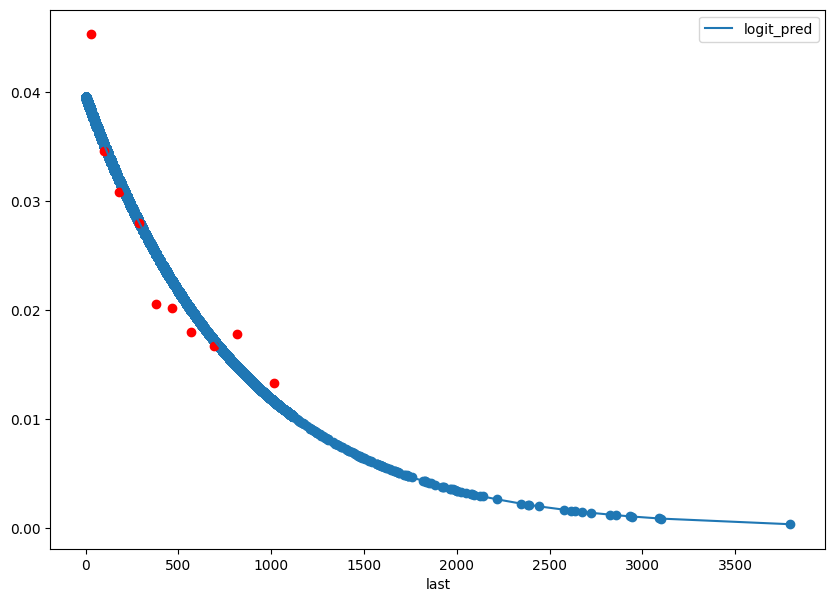

In [32]:
df[ ['last','logit_pred'] ].sort_values('last').plot(kind='line',x='last',y='logit_pred',figsize=[10,7])
plt.scatter(df['last'], df['logit_pred'])
plt.scatter(df.groupby('freq_dec')['last'].mean(),df.groupby('freq_dec')['buyer_dummy'].mean(),color='red')